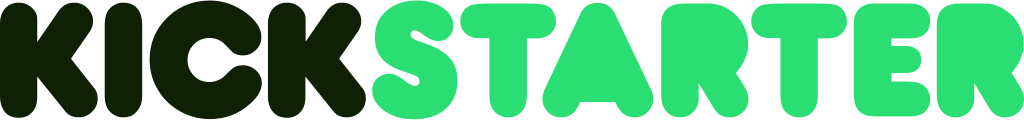

# Анализ данных платформы Kickstarter: определение наиболее успешных категорий проектов и прогнозирование будущих результатов

Наш проект посвящен анализу данных платформы Kickstarter. Мы взяли датасет `kickstarter_projects.csv`, который содержит информацию о проектах, запущенных на платформе Kickstarter. Наша цель - провести различные анализы на основе этих данных и выявить тенденции, тренды и факторы, которые влияют на успех проектов на платформе Kickstarter.
Представим, что сейчас начало 2018 года, и нам нужно выяснить, какие проекты будут успешны в будущем, проанализивав данные за предыдущие годы.

**Цель проекта:**
- изучение распределения проектов по категориям и определение наиболее популярных категорий проектов на платформе;
- определение оптимальной суммы для достижения целей проектов в различных категориях;
- анализ региональных различий и определение наиболее популярных стран для старта проекта;
- изучение трендов и изменений, происходящих на платформе;
- подбор критериев, на которые нужно обратить внимание, чтобы гарантировать успех проекта в будущем.

**Описание данных**: 

В нашем распоряжении датафрейм`kickstarter_projects.csv`, который хранит данные о более чем 375 000 проектах Kickstarter за 2009–2017 годы.

Структура `kickstarter_projects.csv`:
- `ID` индификатор кикстартера
- `Name`название проекта
- `Category` категория проекта
- `Subcategory` подкатегория проекта
- `Country` страна, в которой находится проект
- `Launched` дата запуска проекта
- `Deadline` крайний срок для краудфандинга
- `Goal` сумма денег, необходимая автору для завершения проекта (USD)
- `Pledged` сумма денег, которую удалось собрать (USD)
- `Backers`	количество сторонников
- `State` текущее состояние проекта (на 2018-01-02)

## Откроем файлы с данными и изучим общую информацию

In [52]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from io import BytesIO
import requests

import warnings
# не показываем предупреждения
warnings.filterwarnings('ignore')

In [53]:
try:
    df = pd.read_csv('kickstarter_projects.csv')
except:
    # загрузил датасет на гугл диск, можете скачать проект и запустить на локальном устройстве
    spreadsheet_id = '11lgYWDNU2kh-dNZLdCaPBiUB0NbRndpVez1tqlXEa9Q'
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
    r = requests.get(file_name)
    df = pd.read_csv(BytesIO(r.content))

In [54]:
# напишем функцию для изучения датафрейма
def review(df):
    pd.options.display.max_colwidth = 130
    display(df),
    df.info(),
    print('*'*50),
    print(f'Количество явных дубликатов: {df.duplicated().sum()}'),
    print(f'Доля явных дубликатов: {(df.duplicated().sum() / df.shape[0]):.2%}'), 
    print('*'*50),
    print('Статистическая информация о столбцах:'),
    print(df.describe())

In [55]:
review(df)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limited Edition),Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Flow System,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB
**************************************************
Количество явных дубликатов: 0
Доля явных дубликатов: 0.00%
**************************************************
Статистическая информация о столбцах:
                 ID          Goal       Pledged        Backers
count  3.748530e+05  3.748530

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**
- датафрейм из 374853 строк и 11 столбцов;    
- не во всех колонках типы данных соответствуют сохраненным в них значениям;
- проблемы c названиями столбцов;
- дубликаты не обнаружены;
- пропуски не обнаружены.

## Предобработка данных

Приведем названия столбцов к нижнему регистру:

In [56]:
df.columns = df.columns.str.lower()

Преобразуем данные о времени:

In [57]:
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])

Создадим новые столбцы:
- `launch_year` - год запуска проекта;
- `month` - месяц запуска проекта;
- успешность проекта `hit` - булевое значение;
- `ratio` - соотношение собранных средств к необходимым для завершения проекта;
- `mean_fee` - средний взнос пользователя в проект;
- `days_fee` - сколько дней длился сбор средств.

In [58]:
df['launch_year'] = pd.DatetimeIndex(df['launched']).year
df['month'] = df['launched'].dt.month
df['hit'] = df.pledged >= df.goal
df['ratio'] = round(df.pledged / df.goal, 2)
df['mean_fee'] = round(df.pledged / df.backers, 2)
df['days_fee'] = (df['deadline'] - df['launched']).dt.days

### Проверка данных

Посмотрим, сколько уникальных проектов участвуют в исследовании:

In [59]:
df['id'].nunique()

374853

In [60]:
print(f'Минимальный период исследования: {df.launched.min()}, максимальный: {df.launched.max()}')

Минимальный период исследования: 2009-04-21 21:02:48, максимальный: 2018-01-02 15:02:31


<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**
- заменили названия и тип столбцов;
- добавили новые столбцы;
- период исследования с 2009-04-21 по 2018-01-02;
- в исследовании 374853 проекта.

## Проведем исследовательский анализ данных

Посмотрим на 5 самых больших проектов, по собранным средствам:

In [61]:
df.sort_values(by=['pledged'], ascending=False).head(5)

,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state,launch_year,month,hit,ratio,mean_fee,days_fee
203744,1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Design,Product Design,United States,2015-02-24 15:44:42,2015-03-28,500000,20338986,78471,Successful,2015,2,True,40.68,259.19,31
151239,342886736,COOLEST COOLER: 21st Century Cooler that's Actually Cooler,Design,Product Design,United States,2014-07-08 10:14:37,2014-08-30,50000,13285226,62642,Successful,2014,7,True,265.70,212.08,52
290703,2103598555,"Pebble 2, Time 2 + All-New Pebble Core",Design,Product Design,United States,2016-05-24 15:49:52,2016-06-30,1000000,12779843,66673,Successful,2016,5,True,12.78,191.68,36
318475,545070200,Kingdom Death: Monster 1.5,Games,Tabletop Games,United States,2016-11-25 06:01:41,2017-01-08,100000,12393140,19264,Successful,2016,11,True,123.93,643.33,43
49749,506924864,Pebble: E-Paper Watch for iPhone and Android,Design,Product Design,United States,2012-04-11 06:59:04,2012-05-19,100000,10266846,68929,Successful,2012,4,True,102.67,148.95,37


Самый большой проект по собранным средствам - *Pebble Time - Awesome Smartwatch, No Compromises* под id 1799979574, категории Design и подкатегории Product Design, запущенный в США 2015-02-24 15:44:42. В проекте участвовало 78471 человек, со средним взносом 259.19$, сбор средств длился 31 день, в общем **собрано 20338986**, из 500000 необходимых, они собрали в 40.68 раз больше, чем было нужно.

Посмотрим на 5 самых успешных проектов, по соотношению собранных средств к необходимым для завершения проекта (не ниже 1000$):

In [62]:
df.query('goal >= 1000').sort_values(by=['ratio'], ascending=False).head()

,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state,launch_year,month,hit,ratio,mean_fee,days_fee
194479,1955357092,Exploding Kittens,Games,Tabletop Games,United States,2015-01-20 19:00:19,2015-02-20,10000,8782572,219382,Successful,2015,1,True,878.26,40.03,30
234713,565687737,The World's Best TRAVEL JACKET with 15 Features || BAUBAX,Design,Product Design,United States,2015-07-07 13:52:34,2015-09-03,20000,9192056,44949,Successful,2015,7,True,459.60,204.50,57
305209,1386523707,Fidget Cube: A Vinyl Desk Toy,Design,Product Design,United States,2016-08-30 22:02:09,2016-10-20,15000,6465690,154926,Successful,2016,8,True,431.05,41.73,50
190825,1673731332,"2015 CES Best, First Domestic Robot That Tracks Intruders!",Technology,Robots,United States,2014-12-29 21:30:51,2015-01-28,1000,365538,1627,Successful,2014,12,True,365.54,224.67,29
345592,1697857874,The Component Collector,Games,Tabletop Games,United States,2017-06-01 16:33:04,2017-06-29,1000,327807,2726,Successful,2017,6,True,327.81,120.25,27


Самый успешный проект по собранным средствам, от необходимых, оказался *Exploding Kittens* под id 1955357092, категории *Games* и подкатегории *Tabletop Games*, запущенный в США 2015-01-20 19:00:19. В проекте участвовало 219382 человек, со средним взносом 40.03$, сбор средств длился 30 день, в общем собрано 8782572, из 10000 необходимых, они **собрали в 878.26 раз больше**, чем было нужно.

Напишем функцию для подсчета и построение графика:

In [63]:
"""Функция принимает на вход имя столбца col из датафрейма df. 
   Она считает количество уникальных значений в данном столбце и выводит топ-10 
   наиболее часто встречающихся значений в порядке убывания количества. 
   Затем функция строит круговую диаграмму, которая отображает соотношение 
   количества каждого уникального значения в процентах
"""   
def counts_and_pie(col):
    data = df[col].value_counts().head(10)

    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%')

    print(data);

Посмотрим на топ 10 стран, в которых размещалось больше всего проектов:

United States     292618
United Kingdom     33671
Canada             14756
Australia           7839
Germany             4171
France              2939
Italy               2878
Netherlands         2868
Spain               2276
Sweden              1757
Name: country, dtype: int64


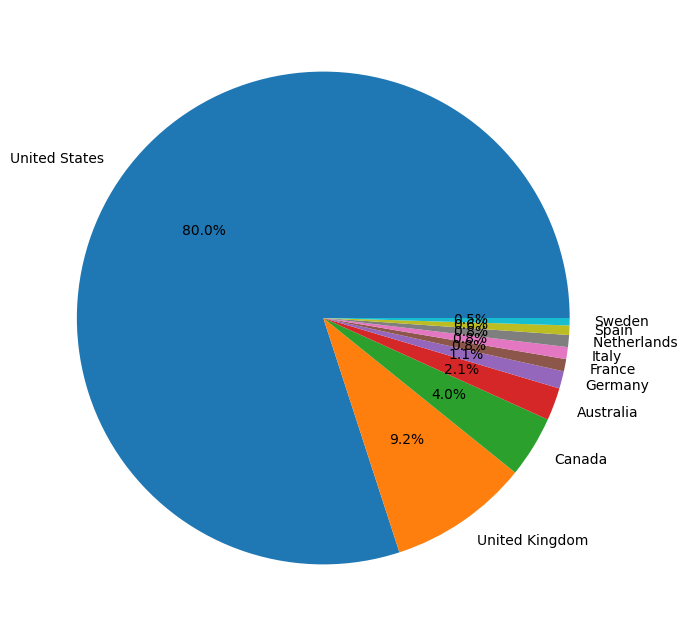

In [64]:
counts_and_pie('country')

Посмотрим на текущее состояния проектов:

Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: state, dtype: int64


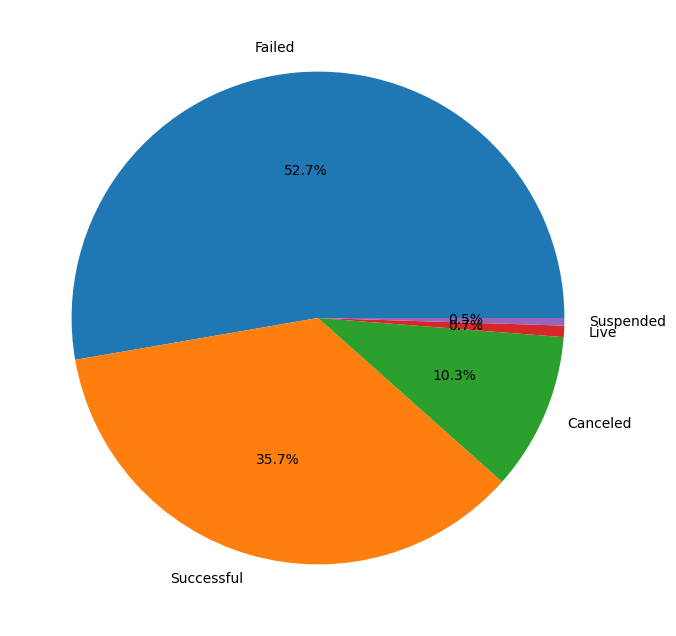

In [65]:
counts_and_pie('state')

Напишем функцию для подсчета процента успешных проектов:

In [66]:
"""Функция принимает на вход имя и название столбца col из датафрейма df. 
   Данная функция строит сводную таблицу по колонке col датафрейма df, 
   которая отображает количество успешных проектов, 
   общее количество проектов и процент успешных проектов для каждого уникального значения в колонке col
"""   
def hit_percent(col, name):
    col, name = col, name
    display(
        df.groupby([col])['hit']
         .agg(['sum', 'count', 'mean'])
         .sort_values(by=['sum'], ascending=False)
         .reset_index()
         .rename(columns={col: name,
                         'sum': 'Кол-во успешных проектов', 
                         'count': 'Всего проектов', 
                         'mean': 'Процент успешных проектов'})
         .assign(**{'Процент успешных проектов': lambda x: round(x['Процент успешных проектов'] * 100, 2)})
        )

В каких странах больше успешных проектов:

In [67]:
hit_percent('country', 'Страна')

,Страна,Кол-во успешных проектов,Всего проектов,Процент успешных проектов
0,United States,110268,292618,37.68
1,United Kingdom,12208,33671,36.26
2,Canada,4230,14756,28.67
3,Australia,2061,7839,26.29
4,Germany,960,4171,23.02
5,France,921,2939,31.34
6,Netherlands,628,2868,21.90
7,Sweden,523,1757,29.77
8,Spain,505,2276,22.19
9,Italy,459,2878,15.95


В каких категориях больше успешных проектов:

In [68]:
hit_percent('category', 'Категория')

,Категория,Кол-во успешных проектов,Всего проектов,Процент успешных проектов
0,Music,24174,49529,48.81
1,Film & Video,23700,62694,37.80
2,Games,12745,35225,36.18
3,Publishing,12377,39378,31.43
4,Art,11603,28151,41.22
5,Design,10869,30065,36.15
6,Technology,6699,32562,20.57
7,Theater,6552,10911,60.05
8,Food,6179,24599,25.12
9,Comics,5875,10819,54.30


В каких подкатегориях больше успешных проектов:

In [69]:
hit_percent('subcategory', 'Подкатегория')

,Подкатегория,Кол-во успешных проектов,Всего проектов,Процент успешных проектов
0,Product Design,8223,22310,36.86
1,Tabletop Games,8003,14178,56.45
2,Shorts,6691,12357,54.15
3,Music,6364,13339,47.71
4,Documentary,5936,16138,36.78
...,...,...,...,...
154,Chiptune,27,35,77.14
155,Embroidery,19,113,16.81
156,Quilts,19,81,23.46
157,Literary Spaces,13,27,48.15


Среднее количество участников в проектах по странам:

In [70]:
"""строим сводную таблицу по колонке country датафрейма df, 
   которая отображает суммарное количество участников, общее 
   количество проектов и среднее количество участников для каждой уникальной страны
"""
(df.groupby(['country'])['backers']
    .agg(['sum', 'count', 'mean'])
    .sort_values(by=['sum'], ascending=False)
    .round()
    .reset_index()
    .rename(columns={'country': 'Страна',
                     'sum': 'Количество участников', 
                     'count': 'Количество проектов', 
                     'mean': 'Среднее кол-во участников'})
)

,Страна,Количество участников,Количество проектов,Среднее кол-во участников
0,United States,33089850,292618,113.0
1,United Kingdom,2859575,33671,85.0
2,Canada,1302563,14756,88.0
3,Australia,642816,7839,82.0
4,Germany,410147,4171,98.0
5,France,350214,2939,119.0
6,Netherlands,228251,2868,80.0
7,Sweden,169344,1757,96.0
8,Spain,164227,2276,72.0
9,Italy,155339,2878,54.0


Сколько в среднем длился сбор средств:

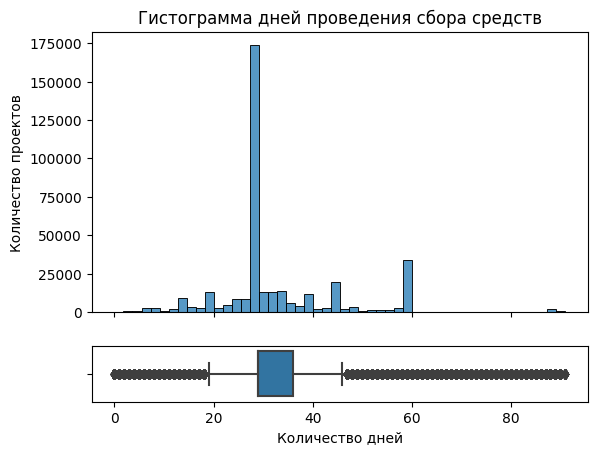

In [71]:
#создаем фигуру с двумя графиками, которые будут размещены друг на друге
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1, 0.2)})

#создаем гистограмму количества проектов в зависимости от количества дней, потребных для сбора средств
sns.histplot(df['days_fee'], bins=50, ax=axs[0])
#создаем ящики с усами, которые показывают статистические характеристики 
#(медиану, квартили, выбросы) распределения количества дней, потребных для сбора средств
sns.boxplot(df['days_fee'], ax=axs[1], fliersize=5.5)

#устанавливаем заголовок и подпись оси x и y
axs[0].set_title('Гистограмма дней проведения сбора средств')
axs[0].set_ylabel('Количество проектов')
plt.xlabel('Количество дней');

Видим 2 моды, 29 и 60 дней, посмотрим почему так вышло:

In [72]:
"""группируем данные в датафрейме df по году запуска проекта и вычисляем количество 
   проектов и медианное значение количества дней, необходимых для сбора средств
"""
(df.groupby(['launch_year'])['days_fee']
    .agg(['count', 'median'])
    .reset_index()
    .rename(columns={'launch_year': 'Год',
                     'count': 'Количество проектов', 
                     'median': 'Сколько в среднем длился сбор средств'})
)

,Год,Количество проектов,Сколько в среднем длился сбор средств
0,2009,1329,60.0
1,2010,10519,43.0
2,2011,26236,32.0
3,2012,41161,29.0
4,2013,44836,29.0
5,2014,66993,29.0
6,2015,74919,29.0
7,2016,56536,29.0
8,2017,52200,29.0
9,2018,124,29.0


В первый год работы сайта Kickstarter сбор средств в среднем длился 60 дней, в последующие годы уменьшился до 29 дня.

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**
- проекты размещаются в 21 странах:
    - 80% США (37.68% успешных);
    - 9.2% Великобритания (36.26% успешных);
    - 4% Канада (28.67% успешных);
    - 2.1% Австралия (26.29% успешных);
    - 1.1% в Германии (23.02% успешных) и др.
- проекты имеют 5 состояний:
    - 52.7% Failed;
    - 35.7% Successful;
    - 10.3% Canceled;
    - 0.7% Live;
    - 0.5% Suspended.
- проекты делятся на 14 категорий, топ 5 по количеству успешных:
    - Music	(48.81% успешных);
    - Film & (Video 37.80% успешных);
    - Games (36.18% успешных);
    - Publishing (31.43% успешных);
    - Art (41.22% успешных).
- проекты делятся на 159 подкатегорий, топ 5 по количеству успешных:
    - Product Design (36.86% успешных);
    - Tabletop Games (56.45% успешных);
    - Shorts (54.15% успешных);
    - Music (47.71% успешных);
    - Documentary (36.78% успешных).
- в среднем сбор средств длился 29 дней;
   

### Посмотрим сколько проектов запускалось в разные годы

In [73]:
#группировка данных в датафрейме df по году запуска проекта 
#и подсчет количества проектов, запущенных в каждый год
df.groupby(['launch_year'])['name'].count()

launch_year
2009     1329
2010    10519
2011    26236
2012    41161
2013    44836
2014    66993
2015    74919
2016    56536
2017    52200
2018      124
Name: name, dtype: int64

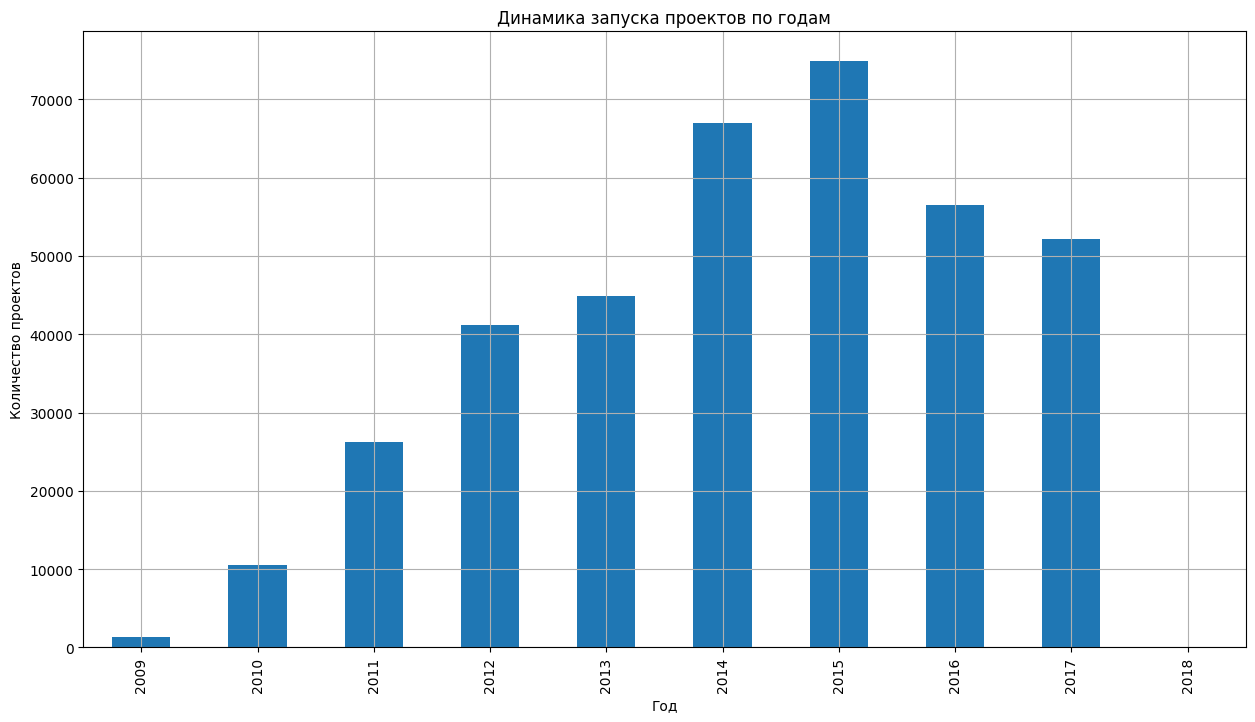

In [74]:
#создаем график, отображающий количество проектов, запущенных в каждый год
plt.figure(figsize=(15, 8))
df.groupby(['launch_year'])['name'].count().plot(kind='bar', grid=True)
plt.title('Динамика запуска проектов по годам')
plt.ylabel('Количество проектов')
plt.xlabel('Год');

- мы видим, что размещение проектов активно увеличивались до 2015 года, после чего пошел спад;
- данные за 2018 год не полные, т.к. год только начался.

Посмотрим состояние проектов по годам, не учитывая 2018 год:

In [75]:
#создаем новый датафрейм df_2009_2017, который содержит только те проекты, 
#которые были запущены в период с 2009 по 2017 годы
df_2009_2017 = df.query('launch_year < 2018')

#получим Series с индексом, состоящим из кортежей (год запуска проекта, статус проекта) 
#и значениями, равными количеству проектов в каждой соответствующей группе
df_2009_2017.groupby(['launch_year', 'state'])['name'].count()

launch_year  state     
2009         Canceled        150
             Failed          600
             Successful      579
2010         Canceled        926
             Failed         4984
             Successful     4593
             Suspended        16
2011         Canceled       2144
             Failed        11877
             Successful    12171
             Suspended        44
2012         Canceled       2631
             Failed        20586
             Successful    17892
             Suspended        52
2013         Canceled       3690
             Failed        21686
             Successful    19402
             Suspended        58
2014         Canceled       7418
             Failed        38199
             Successful    21106
             Suspended       270
2015         Canceled       8926
             Failed        44301
             Successful    20971
             Suspended       721
2016         Canceled       7098
             Failed        30421
             Live  

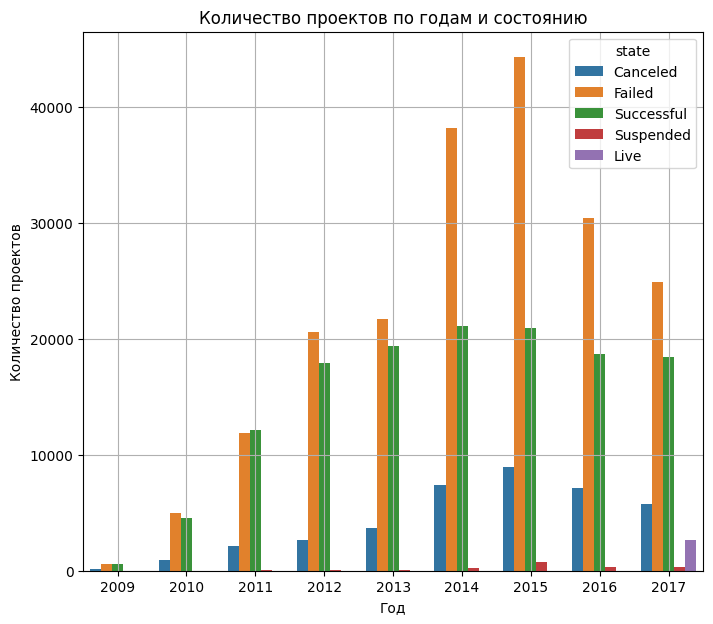

In [76]:
#группируем данные в DataFrame df_2009_2017 по году запуска проекта и статусу (state) проекта, 
#подсчитываем количество проектов в каждой группе
df_for_plot = df_2009_2017.groupby(['launch_year', 'state'])['name'].count().reset_index()

"""создаем столбчатую диаграмму, используя библиотеку Seaborn. Параметр x='launch_year' 
   задает данные для оси x, параметр y='name' задает данные для оси y, а параметр hue='state' 
   указывает на то, что столбцы должны быть разделены на несколько категорий в зависимости 
   от значения в колонке state. Данные для графика берутся из DataFrame df_for_plot
"""
plt.figure(figsize=(8, 7))
sns.barplot(x='launch_year', y='name', hue='state', data=df_for_plot)
plt.grid()
plt.title('Количество проектов по годам и состоянию')
plt.ylabel('Количество проектов')
plt.xlabel('Год');

Построим график динамики размещения проектов по годам:

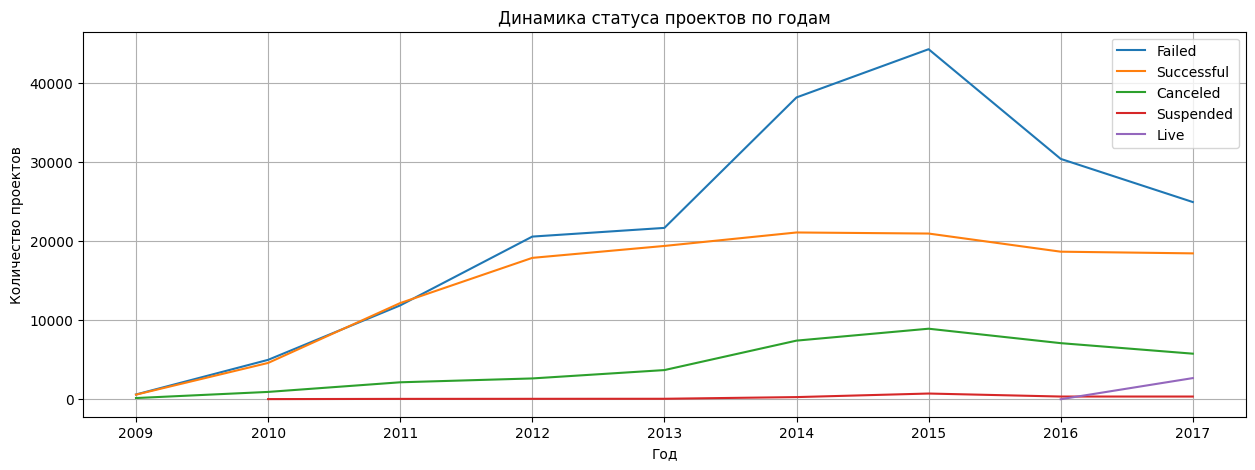

In [77]:
#группируем данные в DataFrame df_2009_2017 по году запуска проекта и статусу (state) проекта, 
#подсчитываем количество проектов в каждой группе
df_for_plot = df_2009_2017.groupby(['state', 'launch_year'])['name'].count()

"""строим график для каждого статуса проекта. Для этого используется данные из Series df_for_plot, 
   соответствующие текущему значению state. Параметр label=state указывает на текстовую метку для легенды, 
   отображающей соответствие линии и статуса проекта.
"""
plt.figure(figsize=(15, 5))
for state in df_2009_2017['state'].unique():
    plt.plot(df_for_plot[state], label=state)
plt.legend()
plt.grid()
plt.title('Динамика статуса проектов по годам')
plt.ylabel('Количество проектов')
plt.xlabel('Год');

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**
- за 2016 год 1 проект еще собирает средства;
- 2675 проектов, запущенные в 2017 году, еще активны;
- в 2013 году начался "хайп", пик которого пришелся на 2015 год, было запущено много проектов, большинство из которых не смогли собрать необходимую сумму средств;
- количество успешных проектов с 2013 по 2017 годы +- одинаковые.

### Посмотрим как менялись размещения проектов по странам

Посмотрим на 10 самых популярных стран, по количеству проектов, в нашем датафрейме:

In [78]:
"""получим Series с индексом, содержащим названия стран, и значениями, 
   равными количеству проектов, запущенных в каждой стране за период с 2009 по 2017 годы. 
   Индекс отсортирован по убыванию, первые 10 значений - это топ-10 стран по количеству запущенных проектов
"""
top_country = df_2009_2017.groupby(['country'])['name'].count().sort_values(ascending=False).head(10)
top_country

country
United States     292536
United Kingdom     33654
Canada             14750
Australia           7833
Germany             4169
France              2938
Italy               2877
Netherlands         2868
Spain               2275
Sweden              1755
Name: name, dtype: int64

Построим распределение по годам:

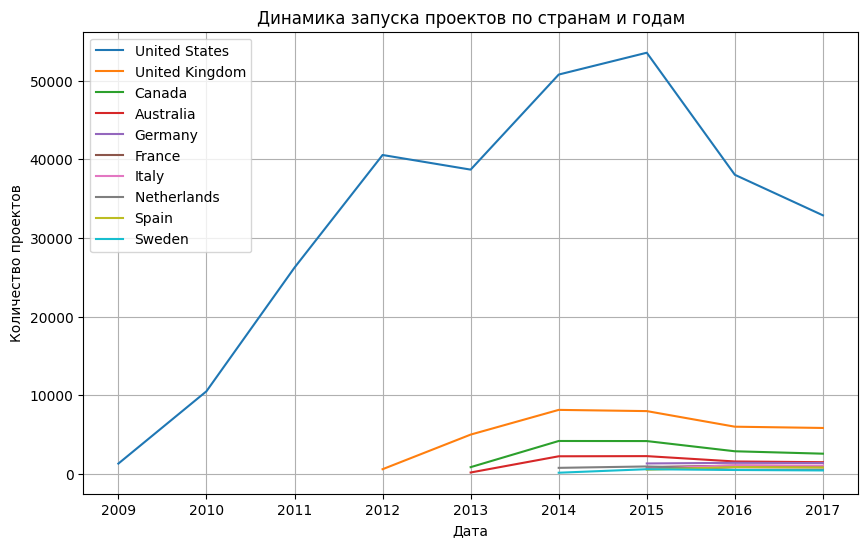

In [79]:
"""Группируем данные в датафрейме df_2009_2017 по стране и году запуска проекта 
   и подсчитываем количество проектов в каждой группе. В результате получается 
   Series с индексом, состоящим из кортежей (страна, год запуска проекта) 
   и значениями, равными количеству проектов в каждой соответствующей группе.
"""
df_for_plot = df_2009_2017.groupby(['country', 'launch_year'])['name'].count()
top_category = ['Music', 'Film & Video', 'Games', 'Publishing', 'Art', 'Design', 'Technology', 'Theater', 'Food']
plt.figure(figsize=(10, 6))
#выполняет цикл по первым 10 элементам индекса top_country
for country in top_country.index:
    #строим график для каждой из первых 10 стран. Для этого используется данные 
    #из Series df_for_plot, соответствующие текущему значению country
    plt.plot(df_for_plot[country], label=country)
plt.legend()
plt.grid()
plt.title('Динамика запуска проектов по странам и годам')
plt.ylabel('Количество проектов')
plt.xlabel('Дата');

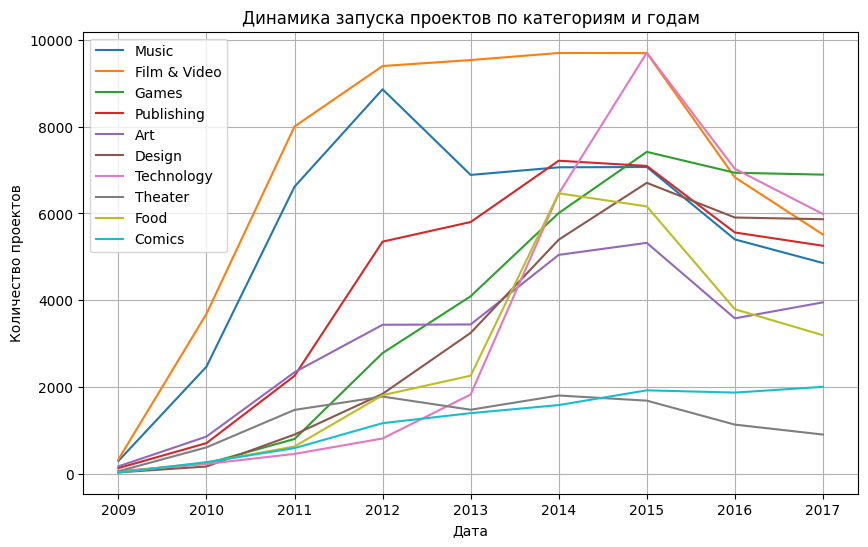

In [80]:
df_for_plot = df_2009_2017.groupby(['category', 'launch_year'])['name'].count()

plt.figure(figsize=(10, 6))
top_category = ['Music', 'Film & Video', 'Games', 'Publishing', 'Art', 
                'Design', 'Technology', 'Theater', 'Food', 'Comics']
#выполняет цикл по 10 популярным категориям
for category in top_category:
    #строим график для каждой из первых 10 стран. Для этого используется данные 
    #из Series df_for_plot, соответствующие текущему значению country
    plt.plot(df_for_plot[category], label=category)
plt.legend()
plt.grid()
plt.title('Динамика запуска проектов по категориям и годам')
plt.ylabel('Количество проектов')
plt.xlabel('Дата');

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:** для дальнейшего анализа оставим США, актуальные годы и уберем активные проекты, т.к.:
- 80% проектов запускались в США;
- В США коэффициент успешных проектов на Kickstarter составляет 37.68%, что является наивысшим показателем;
- активные проекты еще собирают средства, убрав их, мы не исказим данные по проценту успешных проектов по категорям/подкатегоряим;
- оставив последние 3 года, мы сможем расчитать тренд по категориям/подкатегорям проектов.

In [81]:
"""получаем новый датафрейм df_usa, содержащий данные о проектах, которые были 
   запущены в США в 2015 году и позднее, и у которых статус не равен "Live"
"""
df_usa = df_2009_2017.query('country == "United States" & launch_year >= 2015 & state != "Live"') \
                     .reset_index(drop=True)
df_usa

,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state,launch_year,month,hit,ratio,mean_fee,days_fee
0,1452296874,Midnight Lantern: The Album,Music,Indie Rock,United States,2015-01-01 00:04:25,2015-01-24,1200,1853,62,Successful,2015,1,True,1.54,29.89,22
1,1083879175,TROPES: Zombie Edition,Games,Tabletop Games,United States,2015-01-01 00:15:45,2015-01-31,500,915,33,Successful,2015,1,True,1.83,27.73,29
2,1793073132,The Adventures of Hodgi Brigman by Joann Clark~Jackson,Publishing,Young Adult,United States,2015-01-01 00:22:10,2015-01-16,8000,0,0,Failed,2015,1,False,0.00,NaN,14
3,1378102834,Mr. Meow Plush & Pilot,Film & Video,Animation,United States,2015-01-01 00:39:24,2015-02-01,11500,11626,45,Successful,2015,1,True,1.01,258.36,30
4,1879156544,"""Going Due South""",Film & Video,Romance,United States,2015-01-01 00:41:20,2015-02-15,135000,27864,42,Failed,2015,1,False,0.21,663.43,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122787,156799983,Kill Them All!,Games,Tabletop Games,United States,2017-12-28 01:48:58,2017-12-30,250,265,7,Successful,2017,12,True,1.06,37.86,1
122788,710617639,Sculptures of a Dictator,Art,Sculpture,United States,2017-12-28 05:11:20,2018-01-27,30000,535,6,Canceled,2017,12,False,0.02,89.17,29
122789,2019869753,Oasis.nyTheatreGroup/Pieces of a Playwright II,Theater,Plays,United States,2017-12-28 22:50:43,2018-01-27,2000,50,1,Canceled,2017,12,False,0.02,50.00,29
122790,1315429286,Healthcare Web TV Network,Journalism,Web,United States,2017-12-29 21:06:11,2018-01-18,100000,0,0,Canceled,2017,12,False,0.00,NaN,19


### Посмотрим сезонность размещения проектов США за актуальные годы

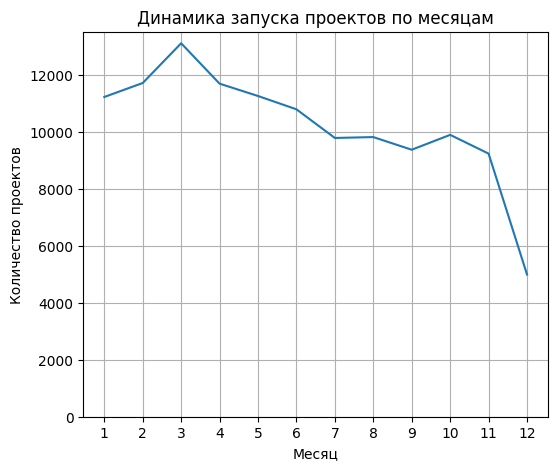

In [82]:
plt.figure(figsize=(6, 5))
df_for_plot = df_usa.groupby('month').id.count()
df_for_plot.plot(xticks=df_for_plot.index)
plt.ylim(ymin=0)
plt.grid()
plt.title('Динамика запуска проектов по месяцам')
plt.ylabel('Количество проектов')
plt.xlabel('Месяц');

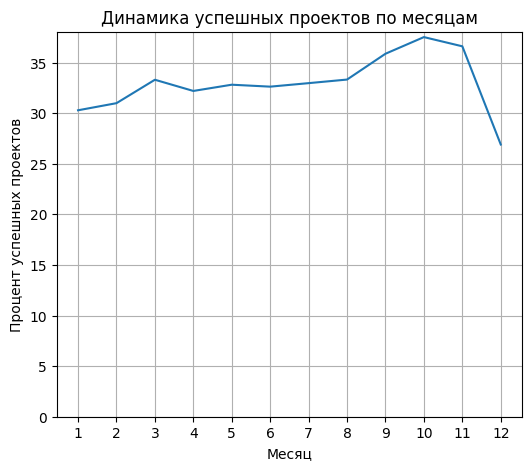

In [83]:
plt.figure(figsize=(6, 5))
df_for_plot = df_usa.groupby('month').hit.mean()*100
df_for_plot.plot(xticks=df_for_plot.index)
plt.ylim(ymin=0)
plt.grid()
plt.title('Динамика успешных проектов по месяцам')
plt.ylabel('Процент успешных проектов')
plt.xlabel('Месяц');

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**
- больше всего проектов запускаются в начале года, пик в марте;
- успешных проекто больше запущенных осенью, пик в октябре.

## Разделим проекты, в соответствии с суммой денег, необходимой автору для завершения проекта

Разделим проекты на 4 категории, воспользуемся функцией *qcut*, чтобы получить равные доли:

In [84]:
#разбивает значения на четыре категории, содержащие примерно равное количество значений, 
#и возвращает новый объект типа Categorical
pd.qcut(df_usa['goal'], 4)

0                (0.999, 2200.0]
1                (0.999, 2200.0]
2              (7000.0, 20000.0]
3              (7000.0, 20000.0]
4         (20000.0, 100000000.0]
                   ...          
122787           (0.999, 2200.0]
122788    (20000.0, 100000000.0]
122789           (0.999, 2200.0]
122790    (20000.0, 100000000.0]
122791           (0.999, 2200.0]
Name: goal, Length: 122792, dtype: category
Categories (4, interval[float64, right]): [(0.999, 2200.0] < (2200.0, 7000.0] < (7000.0, 20000.0] < (20000.0, 100000000.0]]

Создадим переменую `goal_size` и поместим туда категории: 
- *small* проекты до 2200 USD, 
- *medium* от 2200 до 7000,
- *large* от 7000 до 20000, 
- *huge* от 20000

In [85]:
#получаем новый объект типа Categorical, содержащий категории, 
#соответствующие квантилям значений в колонке 'goal'
df_usa['goal_size'] = pd.qcut(df_usa['goal'], 4, labels=['small', 'medium', 'large', 'huge'])

Проверим % успешных проектов в категории `goal_size`:

In [86]:
"""получим датафрейм, который содержит информацию о количестве и проценте 
   успешных проектов в каждой из категорий, созданных на основе целевых сумм
"""
(df_usa.groupby(['goal_size'])['hit']
 .agg(['sum', 'count', 'mean'])
 .sort_values(by=['mean'], ascending=False)
 .reset_index()
 .rename(columns={'goal_size': 'Размер проекта',
                  'sum': 'Кол-во успешных проектов', 
                  'count': 'Всего проектов', 
                  'mean': 'Процент успешных проектов'})
 .assign(**{'Процент успешных проектов': lambda x: round(x['Процент успешных проектов'] * 100, 2)})
)

,Размер проекта,Кол-во успешных проектов,Всего проектов,Процент успешных проектов
0,small,13608,30752,44.25
1,medium,11502,31874,36.09
2,large,10326,31908,32.36
3,huge,5208,28258,18.43


**Вывод:** чем больше требуется средств для завершения проекта, тем меньше проектов успешно завершает сбор.

В дальнейшем посмотрим по категориям `goal_size`, какие категории и подкатегории показывают лучшие результаты по сборам средств.

Напишем функции `cat_analysis`, которая выполняет анализ данных по категориям проектов из датафрейма data:

1. Выбирает топ-5 категорий проектов по их количеству.

2. Считает количество участников в каждой категории успешных проектов и средний взнос для каждой категории:

    - Группирует данные по категории и фильтрует только успешные проекты, относящиеся к выбранным топ-5 категориям.

    - Подсчитывает суммарное количество участников ('backers') и медианный взнос ('median') для каждой категории.

    - Сортирует полученные данные по убыванию суммарного количества участников и устанавливает новый индекс для DataFrame.

    - Объединяет два DataFrame (по участникам и по взносу) по колонке 'category'.

3. Строит график динамики успешности категории проектов по годам:

    - Группирует данные по категории и году запуска проекта и подсчитывает медианную успешность проекта ('ratio') для каждой соответствующей группы.

    - Строит линейный график для каждой из выбранных топ-5 категорий, используя данные из полученного Series.

    - Добавляет легенду на график, устанавливает подписи для осей и заголовок.

Функция выводит результаты анализа данных в виде таблиц и графиков.

In [87]:
def cat_analysis():
    print('Выберем топ 5 категорий проектов по их количеству:')
    top_category = (data.groupby(['category'])['hit']
                    .agg(['sum', 'count', 'mean'])
                    .sort_values(by=['count', 'mean'], ascending=False)
                    .head(5).reset_index()
                    .rename(columns={'sum': 'Успешных проектов',
                                      'count': 'Всего проектов',
                                      'mean': 'Процент успешных проектов'})
                    .assign(**{'Процент успешных проектов': lambda x: round(x['Процент успешных проектов'] * 100, 2)})
    )
    display(top_category)
    print()
    print('Посчитаем участников в каждой категории успешного проекта и средний взнос:')      
    display(
        (data.query('state == "Successful" & category.isin(@top_category.category)')
                 .groupby(['category'])['backers']
                 .agg(['sum', 'median'])
                 .sort_values(by=['sum'], ascending=False)
                 .reset_index()       
                 .rename(columns={'sum': 'Кол-во участников', 
                                  'median': 'В среднем участвуют'}))
    .merge(

        (data.query('state == "Successful" & category.isin(@top_category.category)')
                 .groupby(['category'])['mean_fee']
                 .agg(['mean'])       
                 .rename(columns={'mean': 'Средний взнос'})
                 .assign(**{'Средний взнос': lambda x: round(x['Средний взнос'], 2)}))
        , on='category', how='outer'))

    df_for_plot = (data.query('category.isin(@top_category.category)')
                   .groupby(['category', 'launch_year'])['ratio']
                   .median()
                  )
    print()
    print('Построим график динамики успешности категории проектов по годам:')
    plt.figure(figsize=(6, 4))
    for category in top_category.category:
        plt.plot(df_for_plot[category], label=category)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid()
    years = list(df_for_plot.index.levels[1])
    plt.xticks(years, years)
    plt.title('Динамика успеха категории проекта по годам')
    plt.ylabel('Медианная успешность проекта')
    plt.xlabel('Год')
    plt.show();

Напишем функции `subcat_analysis`, аналогичную `cat_analysis`, только для подкатегорий:

In [88]:
def subcat_analysis():
    for category in top_category:
        print('\033[1m' + f'Исследуем категорию {category}.' + '\033[0m')
        print('Выберем топ 5 подкатегорий проектов по их количеству:')
        top_subcategory = (data.query('category == @category').groupby(['subcategory'])['hit']
                        .agg(['sum', 'count', 'mean'])
                        .sort_values(by=['count', 'mean'], ascending=False)
                        .head(5).reset_index()
                         .rename(columns={'sum': 'Успешных проектов',
                                      'count': 'Всего проектов',
                                      'mean': 'Процент успешных проектов'})
                    .assign(**{'Процент успешных проектов': lambda x: round(x['Процент успешных проектов'] * 100, 2)})
        )
        display(top_subcategory)
        print()
        print('Посчитаем участников в каждой подкатегории успешного проекта и средний взнос:')  
        display(
        (data.query('state == "Successful" & subcategory.isin(@top_subcategory.subcategory)')
                 .groupby(['subcategory'])['backers']
                 .agg(['sum', 'median'])
                 .sort_values(by=['sum'], ascending=False)
                 .reset_index()       
                 .rename(columns={'sum': 'Кол-во участников', 
                                  'median': 'В среднем участвуют'}))
        .merge(

        (data.query('state == "Successful" & subcategory.isin(@top_subcategory.subcategory)')
                 .groupby(['subcategory'])['mean_fee']
                 .agg(['mean'])       
                 .rename(columns={'mean': 'Средний взнос'})
                 .assign(**{'Средний взнос': lambda x: round(x['Средний взнос'], 2)}))
        , on='subcategory', how='outer'))


        df_for_plot = (data.query('category == @category')
                   .groupby(['subcategory', 'launch_year'])['ratio']
                   .median()
                  )

        plt.figure(figsize=(6, 4))
        for category in top_subcategory.subcategory:
            plt.plot(df_for_plot[category], label=category)
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.grid()
        years = list(df_for_plot.index.levels[1])
        plt.xticks(years, years)
        plt.title('Динамика успеха подкатегории проекта по годам')
        plt.ylabel('Медианная успешность проекта')
        plt.xlabel('Год')
        plt.show();

Напишем функцию `bxplt`, для построения графиков "ящик с усами":

In [89]:
def bxplt():
    # создание 2 графиков "ящик с усами"
    fig, axs = plt.subplots(nrows=2, figsize=(8,10))

    # первый график
    sns.boxplot(x='ratio', y='category', data=data, ax=axs[0])
    axs[0].set_title('График "ящик с усами"')
    # второй график
    sns.boxplot(x='ratio', y='category', data=data, showfliers=False, ax=axs[1])
    axs[1].set_title('График "ящик с усами" без выбросов')
    # отображение графиков
    plt.show()

### Изучим категории и подкатегории проектов со сбором средств до 2200 $

In [90]:
#получим новый DataFrame data, который содержит данные только о малых проектах в США 
data = df_usa.query('goal_size == "small"')

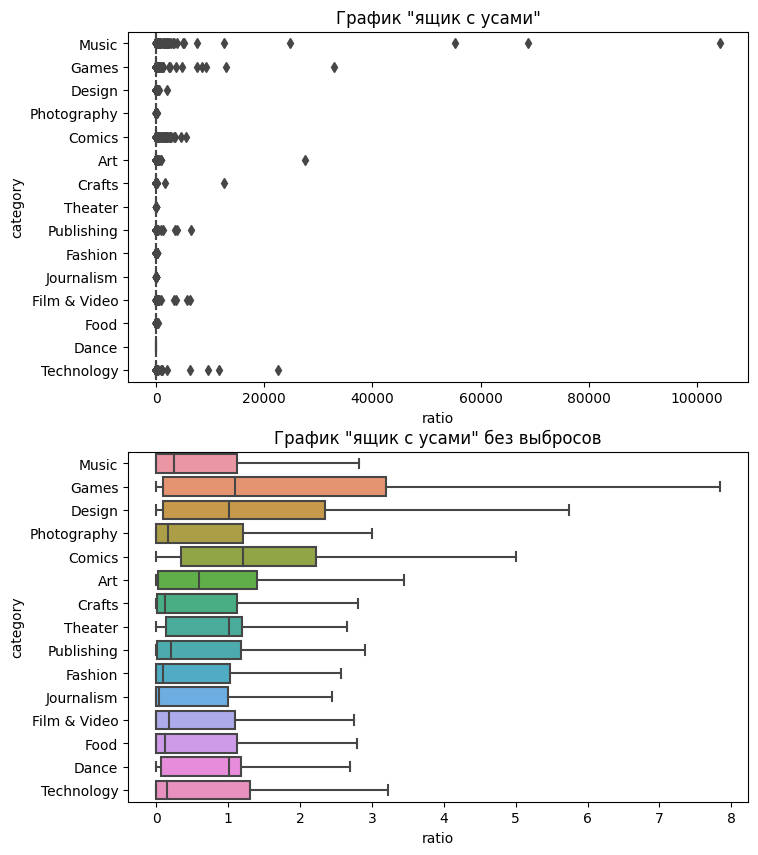

In [91]:
#построим график при помощи нашей функции
bxplt()

На графиках мы видим распределение коэффициента успешности проектов в каждой из категорий проектов с малыми целевыми суммами. Каждая точка на графике представляет собой значение коэффициента успешности для одного проекта. Линия внутри ящика обозначает медианное значение коэффициента, а левая и правая граница ящика соответствуют 25-му и 75-му процентилю соответствующего распределения. Усы на графике указывают на минимальные и максимальные значения (за исключением выбросов).

Проведем анализ по категориям:

Выберем топ 5 категорий проектов по их количеству:


,category,Успешных проектов,Всего проектов,Процент успешных проектов
0,Art,1866,3915,47.66
1,Music,1675,3768,44.45
2,Publishing,1465,3575,40.98
3,Film & Video,1366,3280,41.65
4,Games,1721,3106,55.41



Посчитаем участников в каждой категории успешного проекта и средний взнос:


,category,Кол-во участников,В среднем участвуют,Средний взнос
0,Games,272781,70.0,41.21
1,Art,76719,24.0,49.21
2,Publishing,67716,28.0,49.46
3,Music,64307,25.0,59.78
4,Film & Video,33605,19.0,71.39



Построим график динамики успешности категории проектов по годам:


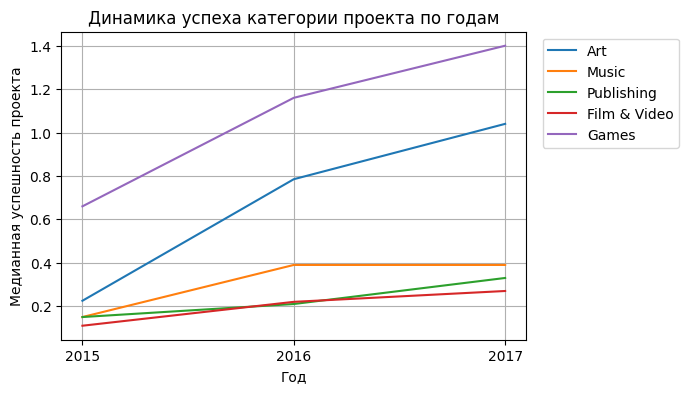

In [92]:
cat_analysis()

Наибольший процент успешных проектов, а так же динамику успеха показывают категории Art, Games и Music.

Добавим их в список `top_category` и изучим их подкатегории:

Исследуем категорию Art.
Выберем топ 5 подкатегорий проектов по их количеству:


,subcategory,Успешных проектов,Всего проектов,Процент успешных проектов
0,Art,576,1236,46.60
1,Illustration,523,838,62.41
2,Painting,188,431,43.62
3,Mixed Media,142,349,40.69
4,Digital Art,88,243,36.21



Посчитаем участников в каждой подкатегории успешного проекта и средний взнос:


,subcategory,Кол-во участников,В среднем участвуют,Средний взнос
0,Illustration,28070,33.0,34.70
1,Art,25370,25.5,46.24
2,Painting,5464,17.0,64.71
3,Mixed Media,4789,19.0,47.29
4,Digital Art,3433,16.0,47.92


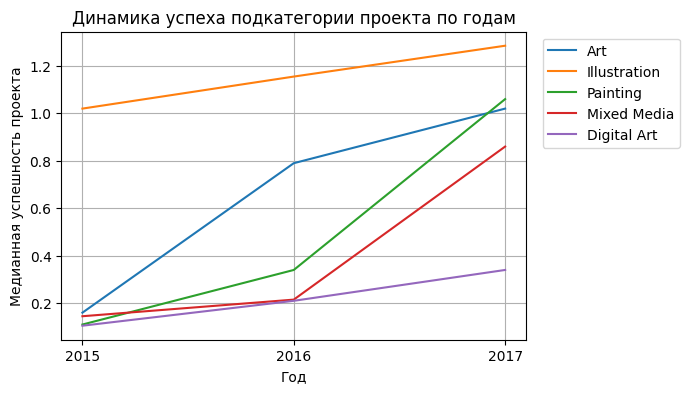

Исследуем категорию Games.
Выберем топ 5 подкатегорий проектов по их количеству:


,subcategory,Успешных проектов,Всего проектов,Процент успешных проектов
0,Tabletop Games,1110,1426,77.84
1,Video Games,200,695,28.78
2,Playing Cards,176,317,55.52
3,Games,115,305,37.70
4,Mobile Games,36,174,20.69



Посчитаем участников в каждой подкатегории успешного проекта и средний взнос:


,subcategory,Кол-во участников,В среднем участвуют,Средний взнос
0,Tabletop Games,222389,93.0,40.24
1,Video Games,17344,32.0,38.95
2,Playing Cards,14988,64.0,39.50
3,Games,10457,35.0,50.15
4,Mobile Games,1094,11.5,46.05


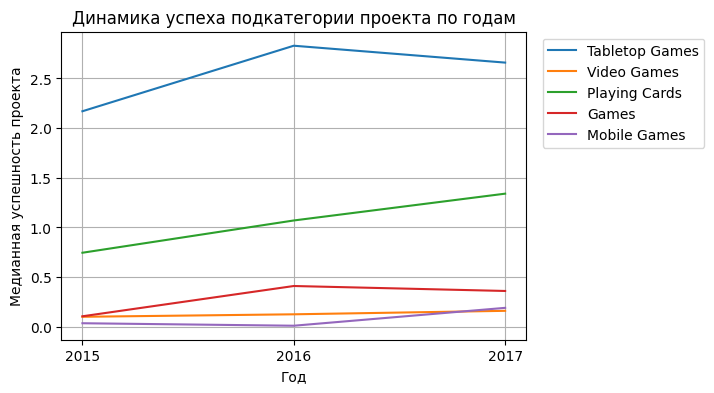

Исследуем категорию Music.
Выберем топ 5 подкатегорий проектов по их количеству:


,subcategory,Успешных проектов,Всего проектов,Процент успешных проектов
0,Music,441,954,46.23
1,Hip-Hop,77,549,14.03
2,Rock,246,441,55.78
3,Indie Rock,203,331,61.33
4,Electronic Music,69,230,30.00



Посчитаем участников в каждой подкатегории успешного проекта и средний взнос:


,subcategory,Кол-во участников,В среднем участвуют,Средний взнос
0,Music,25476,22.0,58.94
1,Rock,8329,25.0,59.95
2,Indie Rock,6277,26.0,56.08
3,Electronic Music,2725,22.0,52.49
4,Hip-Hop,1755,19.5,68.10


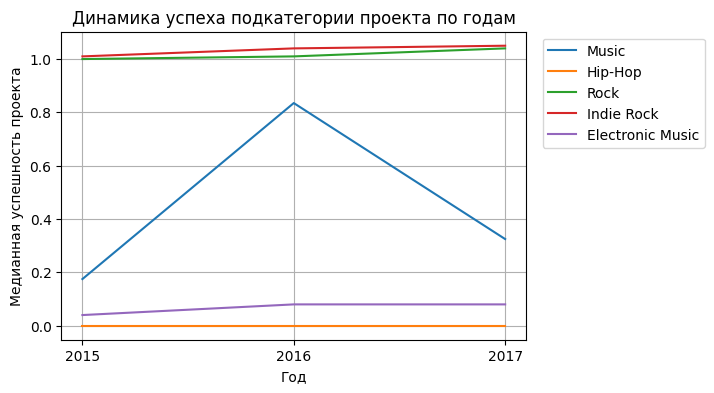

In [93]:
top_category = ['Art', 'Games', 'Music']

subcat_analysis()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**
    
Лучшую диманику успешности из года в год показывают:

| Размер проекта | Категория | Подкатегория | Всего проектов | Успешных, % | Средний взнос пользователя (USD) |  |  |  |  
|:---:|:---|:---|---|---|---|---|---|---|
| small | Art | Art          | 1236 | 46.60 | 46.24 |  |  |  |
|       |   | Illustration | 838 | 62.41 | 34.70 |  |  |  |
|       |   | Painting | 431	 | 43.62 | 64.71 |  |  |  |
|       | Games | Tabletop Games  | 1426 | 77.84 | 40.24 |  |  |  |
|       |   | Playing Cards   | 317	 | 55.52 | 39.50 |  |  |  |
|       | Music | Rock  | 954 | 55.78 | 59.95 |  |  |  |
|       |   | Indie Rock  | 331 | 61.33 | 56.08 |  |  |  | 
    

### Изучим категории и подкатегории проектов со сбором средств от 2200 до 7000 $

Повторим прыдудыщие пункты:

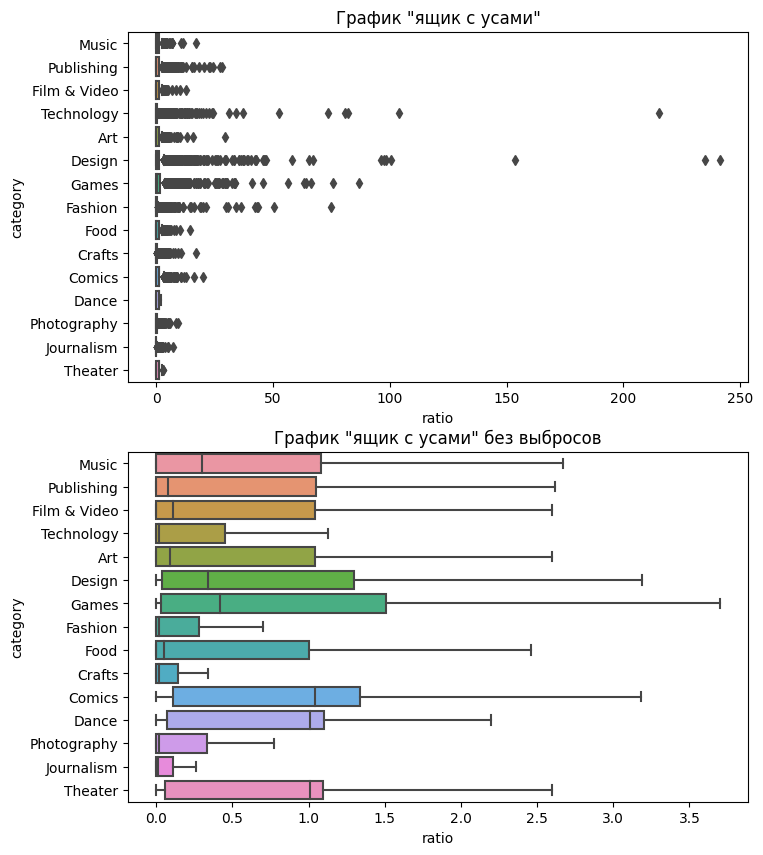

In [94]:
data = df_usa.query('goal_size == "medium"')

bxplt()

Выберем топ 5 категорий проектов по их количеству:


,category,Успешных проектов,Всего проектов,Процент успешных проектов
0,Music,1982,4313,45.95
1,Publishing,1441,4313,33.41
2,Film & Video,1411,3731,37.82
3,Games,1386,3144,44.08
4,Design,979,2417,40.50



Посчитаем участников в каждой категории успешного проекта и средний взнос:


,category,Кол-во участников,В среднем участвуют,Средний взнос
0,Games,523197,197.0,56.85
1,Design,382721,132.5,79.50
2,Publishing,188257,81.0,78.92
3,Music,159469,67.0,90.09
4,Film & Video,87908,52.0,119.05



Построим график динамики успешности категории проектов по годам:


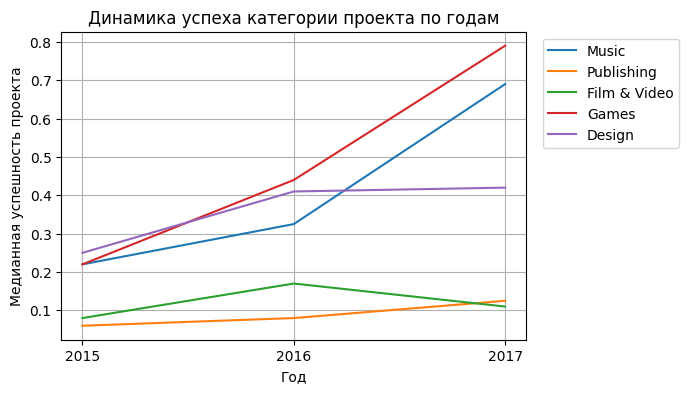

In [95]:
cat_analysis()

Исследуем категорию Music.
Выберем топ 5 подкатегорий проектов по их количеству:


,subcategory,Успешных проектов,Всего проектов,Процент успешных проектов
0,Music,407,770,52.86
1,Hip-Hop,53,522,10.15
2,Country & Folk,294,464,63.36
3,Rock,209,458,45.63
4,Indie Rock,240,369,65.04



Посчитаем участников в каждой подкатегории успешного проекта и средний взнос:


,subcategory,Кол-во участников,В среднем участвуют,Средний взнос
0,Music,38273,71.0,82.31
1,Country & Folk,24923,75.0,78.11
2,Indie Rock,20115,68.0,81.99
3,Rock,14421,63.0,91.75
4,Hip-Hop,3993,73.0,178.54


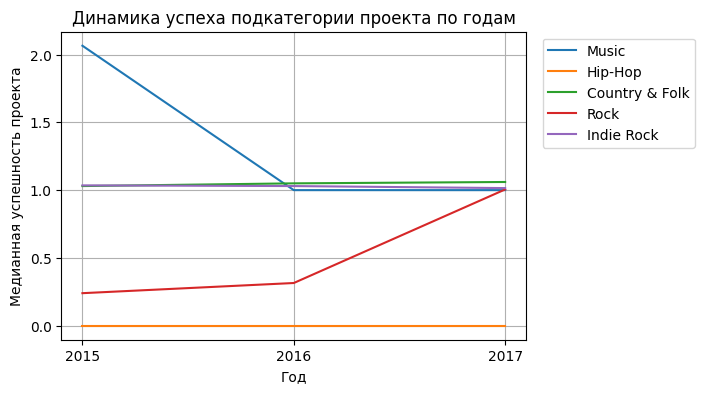

Исследуем категорию Games.
Выберем топ 5 подкатегорий проектов по их количеству:


,subcategory,Успешных проектов,Всего проектов,Процент успешных проектов
0,Tabletop Games,964,1519,63.46
1,Video Games,109,604,18.05
2,Playing Cards,189,452,41.81
3,Games,54,222,24.32
4,Mobile Games,14,174,8.05



Посчитаем участников в каждой подкатегории успешного проекта и средний взнос:


,subcategory,Кол-во участников,В среднем участвуют,Средний взнос
0,Tabletop Games,414940,207.5,54.98
1,Playing Cards,51851,215.5,46.68
2,Video Games,29132,192.0,54.91
3,Games,18288,121.5,67.25
4,Mobile Games,1836,69.5,102.94


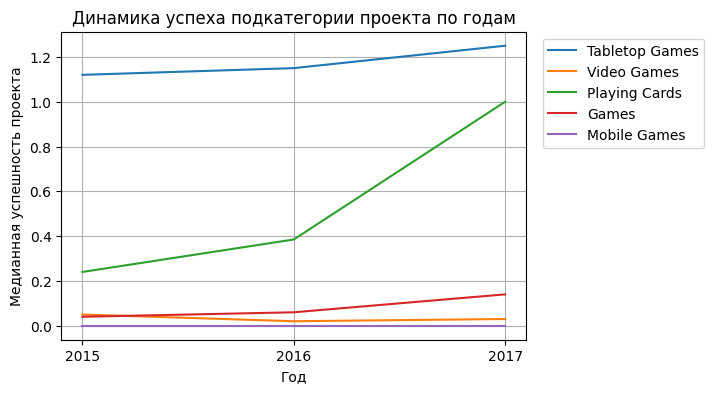

Исследуем категорию Design.
Выберем топ 5 подкатегорий проектов по их количеству:


,subcategory,Успешных проектов,Всего проектов,Процент успешных проектов
0,Product Design,768,1765,43.51
1,Design,130,349,37.25
2,Graphic Design,40,162,24.69
3,Interactive Design,11,49,22.45
4,Architecture,11,45,24.44



Посчитаем участников в каждой подкатегории успешного проекта и средний взнос:


,subcategory,Кол-во участников,В среднем участвуют,Средний взнос
0,Product Design,300285,143.0,78.24
1,Design,70951,115.0,86.54
2,Graphic Design,8775,138.0,65.38
3,Interactive Design,797,76.5,78.39
4,Architecture,574,42.0,98.55


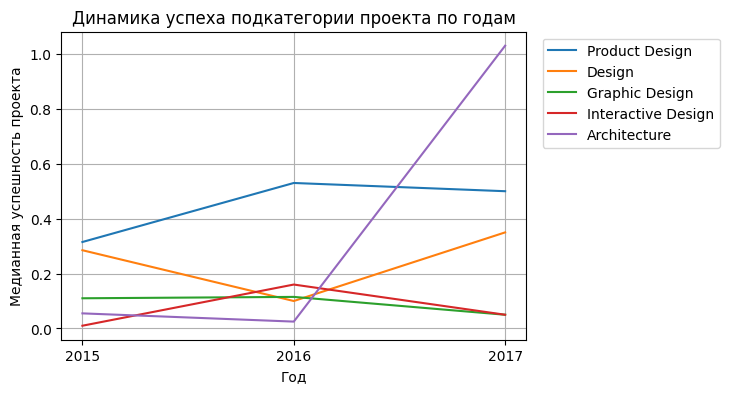

In [96]:
top_category = ['Music', 'Games', 'Design']

subcat_analysis()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**

| Размер проекта | Категория | Подкатегория | Всего проектов | Успешных, % | Средний взнос пользователя (USD) |  |  |  |  
|:---:|:---|:---|---|---|---|---|---|---|
| medium | Music | Music | 770 | 52.86 | 82.31 |  |  |  |
|       |  | Country & Folk | 464	 | 63.36 | 78.11 |  |  |  |
|       |  | Rock    | 458 | 45.63 | 91.75 |  |  |  |
|       |  | Indie Rock     | 369	 | 65.04 | 81.99 |  |  |  |
|       | Games | Tabletop Games  | 1519 | 63.46 | 54.98 |  |  |  |
|       |  | Playing Cards   | 452	 | 41.81 | 46.68 |  |  |  |
|       | Design | Product Design  | 1765 | 43.51 | 78.24 |  |  |  |
|       |  | Design  | 349	 | 37.25 | 86.54 |  |  |  | 

### Изучим категории и подкатегории проектов со сбором средств от 7000 до 20000 $

Повторим прыдудыщие пункты:

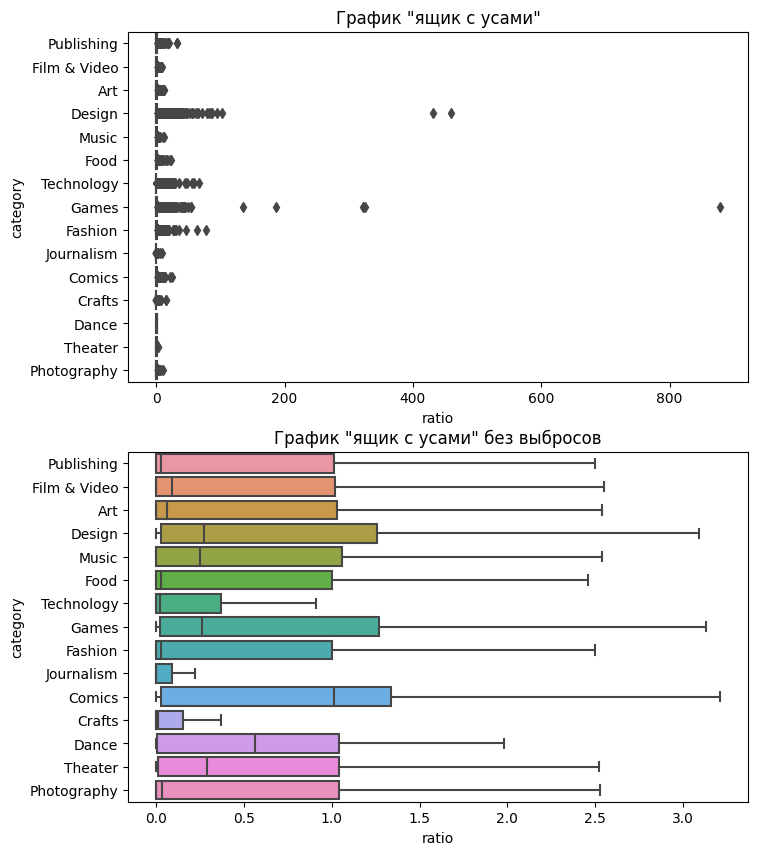

In [97]:
data = df_usa.query('goal_size == "large"')

bxplt()

Выберем топ 5 категорий проектов по их количеству:


,category,Успешных проектов,Всего проектов,Процент успешных проектов
0,Games,1458,3892,37.46
1,Film & Video,1304,3803,34.29
2,Design,1399,3631,38.53
3,Technology,754,3581,21.06
4,Music,1504,3384,44.44



Посчитаем участников в каждой категории успешного проекта и средний взнос:


,category,Кол-во участников,В среднем участвуют,Средний взнос
0,Games,1700049,436.5,75.53
1,Design,1369596,261.0,127.56
2,Technology,444925,205.0,178.81
3,Music,265255,142.0,109.64
4,Film & Video,188604,121.0,141.77



Построим график динамики успешности категории проектов по годам:


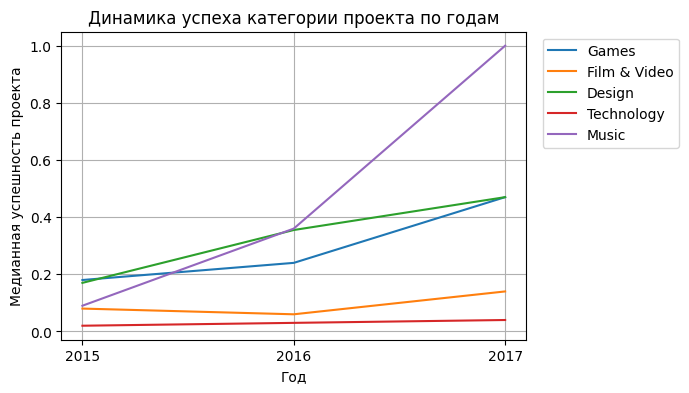

In [98]:
cat_analysis()

Исследуем категорию Games.
Выберем топ 5 подкатегорий проектов по их количеству:


,subcategory,Успешных проектов,Всего проектов,Процент успешных проектов
0,Tabletop Games,1030,1979,52.05
1,Video Games,132,688,19.19
2,Playing Cards,189,540,35.00
3,Games,49,272,18.01
4,Mobile Games,17,196,8.67



Посчитаем участников в каждой подкатегории успешного проекта и средний взнос:


,subcategory,Кол-во участников,В среднем участвуют,Средний взнос
0,Tabletop Games,1487141,511.5,64.75
1,Playing Cards,98842,366.0,55.39
2,Video Games,73496,406.0,74.78
3,Games,19245,200.0,107.23
4,Mobile Games,1645,106.5,796.12


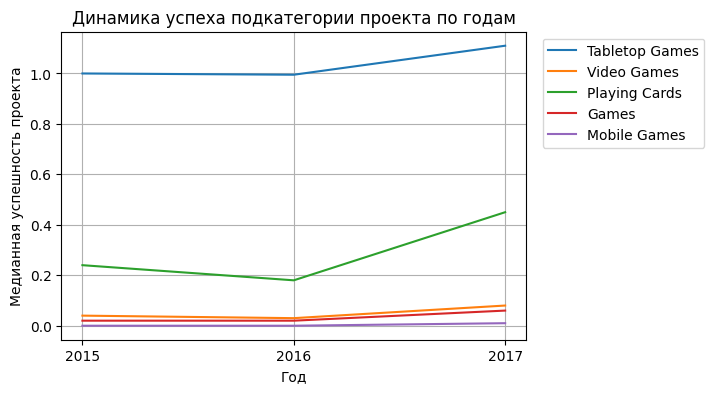

Исследуем категорию Design.
Выберем топ 5 подкатегорий проектов по их количеству:


,subcategory,Успешных проектов,Всего проектов,Процент успешных проектов
0,Product Design,1204,2945,40.88
1,Design,128,414,30.92
2,Architecture,29,106,27.36
3,Graphic Design,9,68,13.24
4,Interactive Design,10,54,18.52



Посчитаем участников в каждой подкатегории успешного проекта и средний взнос:


,subcategory,Кол-во участников,В среднем участвуют,Средний взнос
0,Product Design,1263653,284.0,128.04
1,Design,91569,250.0,130.12
2,Architecture,4873,145.0,125.62
3,Graphic Design,2268,137.0,82.88
4,Interactive Design,1570,140.0,131.34


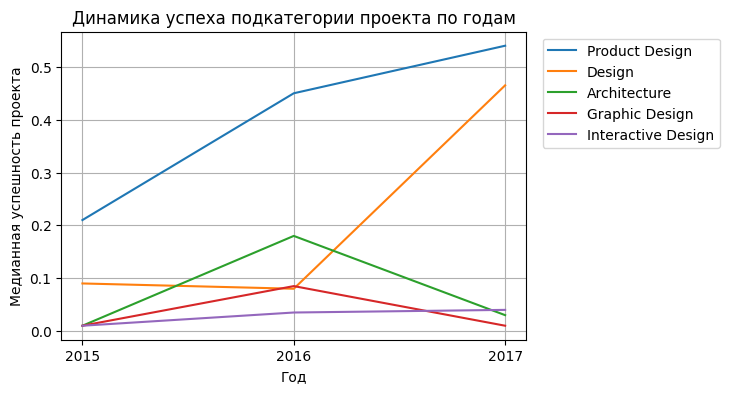

Исследуем категорию Music.
Выберем топ 5 подкатегорий проектов по их количеству:


,subcategory,Успешных проектов,Всего проектов,Процент успешных проектов
0,Music,503,1108,45.40
1,Country & Folk,229,358,63.97
2,Hip-Hop,21,333,6.31
3,Rock,111,251,44.22
4,Faith,104,213,48.83



Посчитаем участников в каждой подкатегории успешного проекта и средний взнос:


,subcategory,Кол-во участников,В среднем участвуют,Средний взнос
0,Music,98653,147.0,111.87
1,Country & Folk,37351,155.0,108.45
2,Rock,19855,142.0,104.30
3,Faith,13307,111.0,135.39
4,Hip-Hop,4412,206.0,79.69


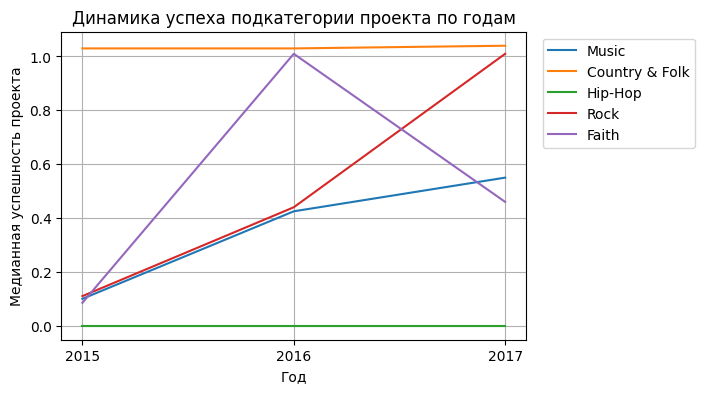

In [99]:
top_category = ['Games', 'Design', 'Music']

subcat_analysis()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**

| Размер проекта | Категория | Подкатегория | Всего проектов | Успешных, % | Средний взнос пользователя (USD) |  |  |  |  
|:---:|:---|:---|---|---|---|---|---|---|
| large | Games | Tabletop Games  | 1979 | 52.05 | 64.75 |  |  |  |
|       |  | Playing Cards | 540 | 35.00 | 55.39 |  |  |  |
|       | Design | Product Design  | 2945 | 40.88 | 128.04 |  |  |  |
|       |  | Design   | 414 | 30.92 | 130.12 |  |  |  |
|       | Music | Country & Folk  | 358 | 63.97 | 108.45 |  |  |  |
|       |  | Rock  | 251	 | 44.22 | 104.30 |  |  |  | 

### Изучим категории и подкатегории проектов со сбором средств от 20000 $

Повторим прыдудыщие пункты:

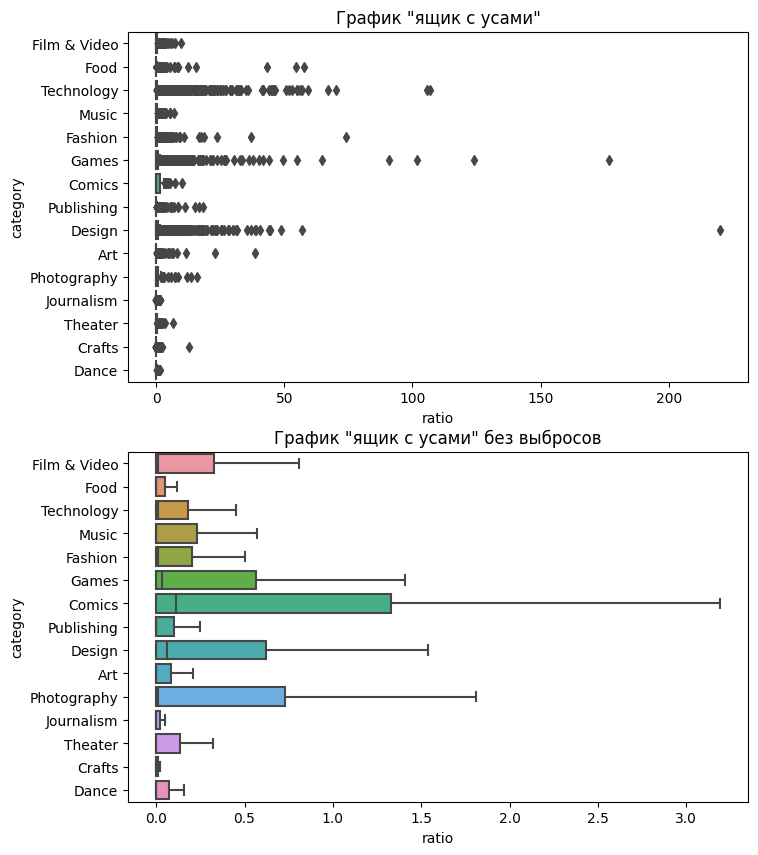

In [100]:
data = df_usa.query('goal_size == "huge"')

bxplt()

Выберем топ 5 категорий проектов по их количеству:


,category,Успешных проектов,Всего проектов,Процент успешных проектов
0,Technology,1081,6664,16.22
1,Film & Video,908,4338,20.93
2,Design,883,3777,23.38
3,Food,392,3339,11.74
4,Games,689,3058,22.53



Посчитаем участников в каждой категории успешного проекта и средний взнос:


,category,Кол-во участников,В среднем участвуют,Средний взнос
0,Games,2109219,1347.0,110.63
1,Technology,1665628,555.0,308.11
2,Design,1253210,524.5,236.59
3,Film & Video,613337,327.0,172.77
4,Food,194631,251.5,204.11



Построим график динамики успешности категории проектов по годам:


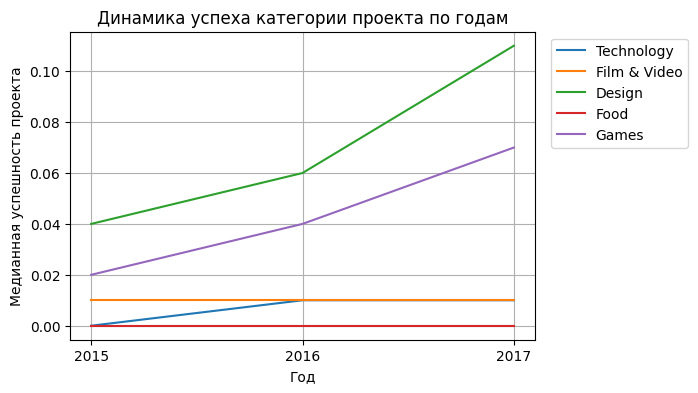

In [101]:
cat_analysis()

Исследуем категорию Film & Video.
Выберем топ 5 подкатегорий проектов по их количеству:


,subcategory,Успешных проектов,Всего проектов,Процент успешных проектов
0,Documentary,409,1354,30.21
1,Film & Video,105,519,20.23
2,Drama,38,304,12.50
3,Webseries,40,267,14.98
4,Television,15,256,5.86



Посчитаем участников в каждой подкатегории успешного проекта и средний взнос:


,subcategory,Кол-во участников,В среднем участвуют,Средний взнос
0,Documentary,234783,318.0,172.31
1,Film & Video,69772,359.0,156.95
2,Television,54770,253.0,194.96
3,Webseries,27133,323.5,149.07
4,Drama,13862,241.5,271.36


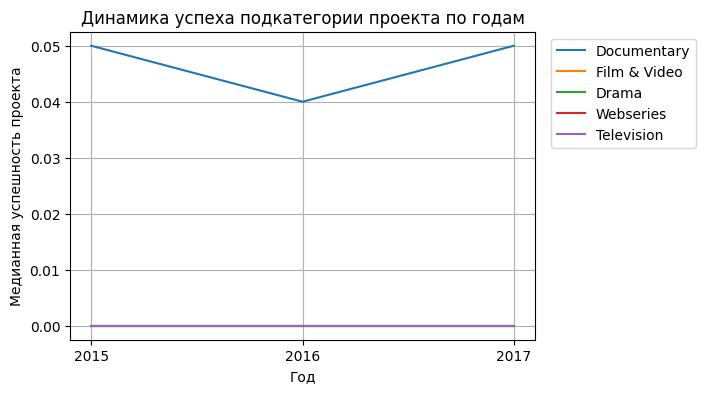

Исследуем категорию Design.
Выберем топ 5 подкатегорий проектов по их количеству:


,subcategory,Успешных проектов,Всего проектов,Процент успешных проектов
0,Product Design,746,2996,24.90
1,Design,81,426,19.01
2,Architecture,15,175,8.57
3,Interactive Design,9,64,14.06
4,Civic Design,14,58,24.14



Посчитаем участников в каждой подкатегории успешного проекта и средний взнос:


,subcategory,Кол-во участников,В среднем участвуют,Средний взнос
0,Product Design,1092384,536.0,236.80
1,Design,103643,431.0,291.60
2,Architecture,15087,303.0,192.69
3,Civic Design,11355,526.5,143.83
4,Interactive Design,4921,246.0,249.24


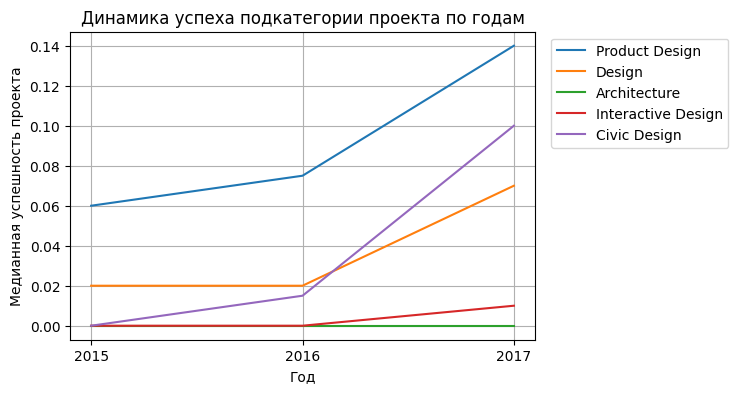

Исследуем категорию Games.
Выберем топ 5 подкатегорий проектов по их количеству:


,subcategory,Успешных проектов,Всего проектов,Процент успешных проектов
0,Tabletop Games,460,1112,41.37
1,Video Games,168,1094,15.36
2,Mobile Games,11,229,4.80
3,Games,17,228,7.46
4,Live Games,6,204,2.94



Посчитаем участников в каждой подкатегории успешного проекта и средний взнос:


,subcategory,Кол-во участников,В среднем участвуют,Средний взнос
0,Tabletop Games,1266750,1366.5,119.48
1,Video Games,777318,1617.0,59.40
2,Games,13432,525.5,213.93
3,Mobile Games,11723,476.0,138.30
4,Live Games,1682,223.0,298.59


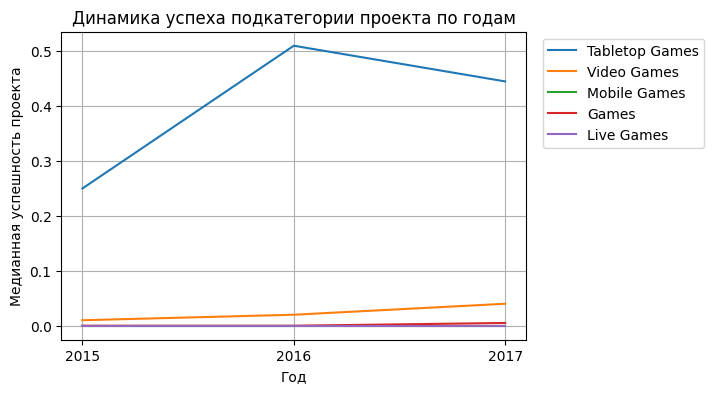

In [102]:
top_category = ['Film & Video', 'Design', 'Games']

subcat_analysis()

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**

    
| Размер проекта | Категория | Подкатегория | Всего проектов | Успешных, % | Средний взнос пользователя (USD) |  |  |  |  
|:---:|:---|:---|---|---|---|---|---|---|
| huge | Film & Video | Documentary | 1354	 | 30.21 | 172.31 |  |  |  |
|          | Design | Product Design  | 2996 | 24.90 | 236.80 |  |  |  |
|          | Games | Tabletop Games  | 1112	 | 41.37 | 119.48 |  |  |  |    

## Выводы

Получив данные, нам досталось 374853 строк и 11 столбцов. Данные начиная с 2009-04-21 по 2018-01-02, они оказались вполне "чистыми", без дубликатов и пропусков, пришлось лишь заменить названия столбцов и типы данных, где это требуется. Ещё создали новые столбцы, посчитали и добавили интересующие нас параметры, такие как:
- `launch_year` - год запуска проекта;
- `hit` - успешность проекта (булевое значение);
- `ratio` - соотношение собранных средств к необходимым для завершения проекта;
- `mean_fee` - средний взнос пользователя в проект;
- `days_fee` - сколько дней длился сбор средств.


**Проведя исследование по всем данным, мы выявили:**
- проекты размещаются в 21 странах:
    - 80% США (37.68% успешных);
    - 9.2% Великобритания (36.26% успешных);
    - 4% Канада (28.67% успешных);
    - 2.1% Австралия (26.29% успешных);
    - 1.1% в Германии (23.02% успешных) и др.
- проекты имеют 5 состояний:
    - 52.7% Failed;
    - 35.7% Successful;
    - 10.3% Canceled;
    - 0.7% Live;
    - 0.5% Suspended.
- проекты делятся на 14 категорий, топ 5 по количеству успешных:
    - Music	(48.81% успешных);
    - Film & (Video 37.80% успешных);
    - Games (36.18% успешных);
    - Publishing (31.43% успешных);
    - Art (41.22% успешных).
- проекты делятся на 159 подкатегорий, топ 5 по количеству успешных:
    - Product Design (36.86% успешных);
    - Tabletop Games (56.45% успешных);
    - Shorts (54.15% успешных);
    - Music (47.71% успешных);
    - Documentary (36.78% успешных).
- в среднем сбор средств длился 29 дней;
- количество проектов активно увеличивалось до 2015 года, так же увеличивалось и кол-во неудачных проектов, после 2015 года запуск новых проектов стал замедляться;
- в 2014 году начался "хайп", пик которого пришелся на 2015 год, было запущено много проектов, большинство из которых не смогли собрать необходимую сумму средств;
- количество успешных проектов с 2013 по 2017 годы +- одинаковые;
- за 2015-2017 годы в США больше всего проектов запускаются в начале года (пик в марте), однако, успешных проектов больше осенью (пик в октябре).

**Для инвесторов** 

Чтобы выбрать тип наиболее успешных проектов, мы оставили данные США за последние 3 года, а так же убрали проекты, которые еще собирают средства. У нас осталось 122792 проекта, разделив их на 4 равные доли, учитывая сумму денег, необходимую автору для завершения проекта, провели исследование и выявили подкатегории проектов, которые из года в год показывают наибольший результат успешности:

| Размер проекта (USD) | Категория | Подкатегория | Всего проектов | Успешных, % | Средний взнос пользователя (USD) |  |  |  | 
|:---:|:---|:---|---|---|---|---|---|---|
| до 2200 | Art | Art          | 1236 | 46.60 | 46.24 |  |  |  |
|       |   | Illustration | 838 | 62.41 | 34.70 |  |  |  |
|       |   | Painting | 431	 | 43.62 | 64.71 |  |  |  |
|       | Games | Tabletop Games  | 1426 | 77.84 | 40.24 |  |  |  |
|       |   | Playing Cards   | 317	 | 55.52 | 39.50 |  |  |  |
|       | Music | Rock  | 954 | 55.78 | 59.95 |  |  |  |
|       |   | Indie Rock  | 331 | 61.33 | 56.08 |  |  |  | 
| 2200 - 7000 | Music | Music | 770 | 52.86 | 82.31 |  |  |  |
|       |  | Country & Folk | 464	 | 63.36 | 78.11 |  |  |  |
|       |  | Rock    | 458 | 45.63 | 91.75 |  |  |  |
|       |  | Indie Rock     | 369	 | 65.04 | 81.99 |  |  |  |
|       | Games | Tabletop Games  | 1519 | 63.46 | 54.98 |  |  |  |
|       |  | Playing Cards   | 452	 | 41.81 | 46.68 |  |  |  |
|       | Design | Product Design  | 1765 | 43.51 | 78.24 |  |  |  |
|       |  | Design  | 349	 | 37.25 | 86.54 |  |  |  | 
| 7000 - 20000 | Games | Tabletop Games  | 1979 | 52.05 | 64.75 |  |  |  |
|       |  | Playing Cards | 540 | 35.00 | 55.39 |  |  |  |
|       | Design | Product Design  | 2945 | 40.88 | 128.04 |  |  |  |
|       |  | Design   | 414 | 30.92 | 130.12 |  |  |  |
|       | Music | Country & Folk  | 358 | 63.97 | 108.45 |  |  |  |
|       |  | Rock  | 251	 | 44.22 | 104.30 |  |  |  | 
| от 20000 | Film & Video | Documentary | 1354	 | 30.21 | 172.31 |  |  |  |
|          | Design | Product Design  | 2996 | 24.90 | 236.80 |  |  |  |
|          | Games | Tabletop Games  | 1112	 | 41.37 | 119.48 |  |  |  |